In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
users = pd.read_csv('user_table.csv')
users

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain
...,...,...,...,...
452862,756215,F,27,Venezuela
452863,36888,M,18,Argentina
452864,800559,M,28,Bolivia
452865,176584,M,19,Chile


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [9]:
test = pd.read_csv('test_table.csv',parse_dates=['date'])
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


### check uniqueness of users for each table

In [12]:
print("there are %i unique users"%users['user_id'].nunique())
print("there are %i unique users"%test['user_id'].nunique())

there are 452867 unique users
there are 453321 unique users


### check missing value for both table

In [14]:
users.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [15]:
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

The null ads channel means the user doesnt come to site via ads

### merge table

In [19]:
temp = pd.merge(left=test,right=users, how='left',on='user_id')
temp

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50.0,Mexico
453317,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20.0,Colombia
453318,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25.0,Spain
453319,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21.0,Colombia


In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
 9   sex               452867 non-null  object        
 10  age               452867 non-null  float64       
 11  country           452867 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 45.0+ MB


### AB test

/Users/jinq/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'conversion rate vs country')

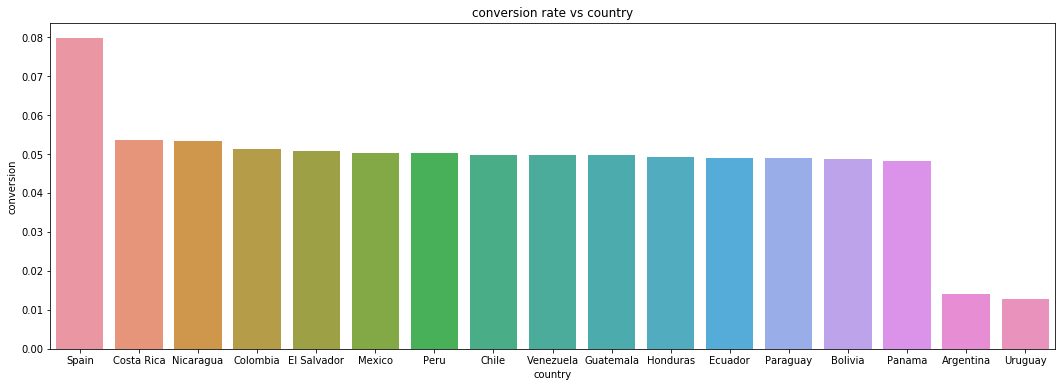

In [38]:
#check spanish user has higher conversion rate then other LatAm countries
groupby_country = temp.groupby('country')['conversion','country'].mean()
groupby_country = groupby_country.reset_index()
groupby_country.sort_values(by='conversion',inplace= True,ascending=False)

fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(x='country',y='conversion',data=groupby_country,ax=ax)
ax.set_title('conversion rate vs country')

According to the graph we can clearly see that the spanish-based user has higher conversion than other LatAm country

Text(0.5, 1.0, 'conversion rate vs country')

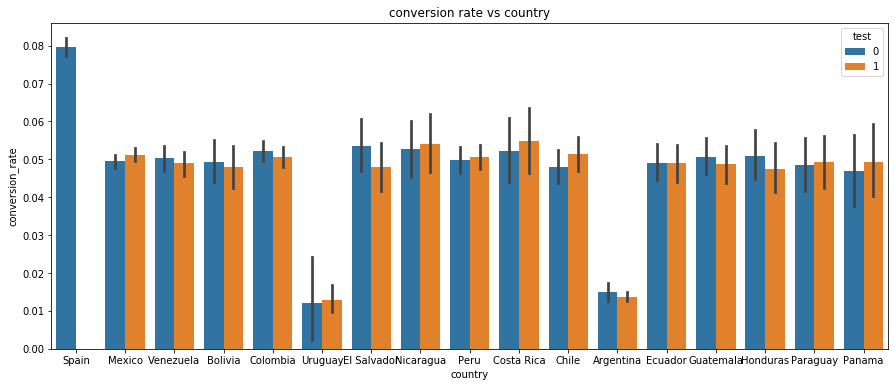

In [39]:
#check if the test is actually negative that means non-localization is doing better
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='conversion',hue='test',data=temp,ax=ax)
ax.set_ylabel('conversion_rate')
ax.set_title('conversion rate vs country')

In [51]:
test_val = temp[temp['test']==1]['conversion'].values
cont_val = temp[temp['test']==0]['conversion'].values
print('test mean conversion rate is %.3f'%test_val.mean())
print('non test mean conversion rate is %.3f'%cont_val.mean())

test mean conversion rate is 0.043
non test mean conversion rate is 0.055


* null hypothesis: non test conversion rate = test conversion rate
* alternative hypothesis: non test conversion rate > test conversion rate

assume unknown population distribution, we should use two sample t test

In [57]:
from scipy.stats import ttest_ind
from scipy.stats import norm
tsta, pval = ttest_ind(test_val,cont_val,equal_var=False)
pval

7.030776744312677e-75

since p-value < 0.05, we can reject the null hypothesis and accept alternative hypothesis, non localization performs better. 

### segment analysis

In [60]:
#exclude 
temp = temp[temp['country']!='Spain']
temp['country'].value_counts()

Mexico         128484
Colombia        54060
Argentina       46733
Peru            33666
Venezuela       32054
Chile           19737
Ecuador         15895
Guatemala       15125
Bolivia         11124
Honduras         8568
El Salvador      8175
Paraguay         7347
Nicaragua        6723
Costa Rica       5309
Uruguay          4134
Panama           3951
Name: country, dtype: int64

Text(0, 0.5, 'conversion rate')

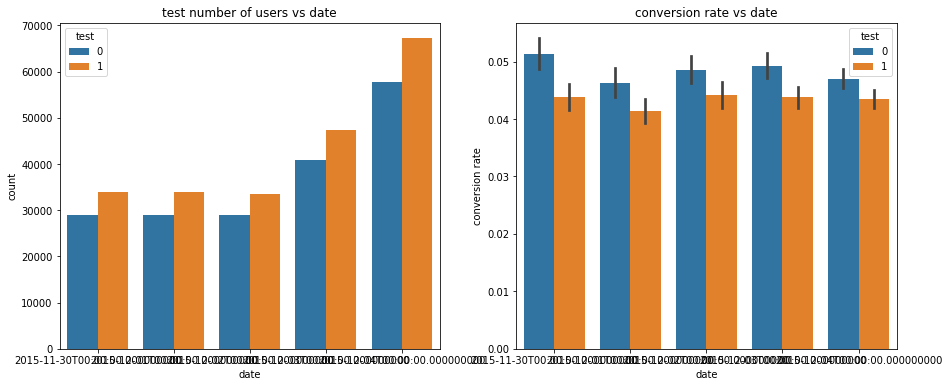

In [75]:
#visualization of date
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='date',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs date")

sns.barplot(x='date',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs date')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

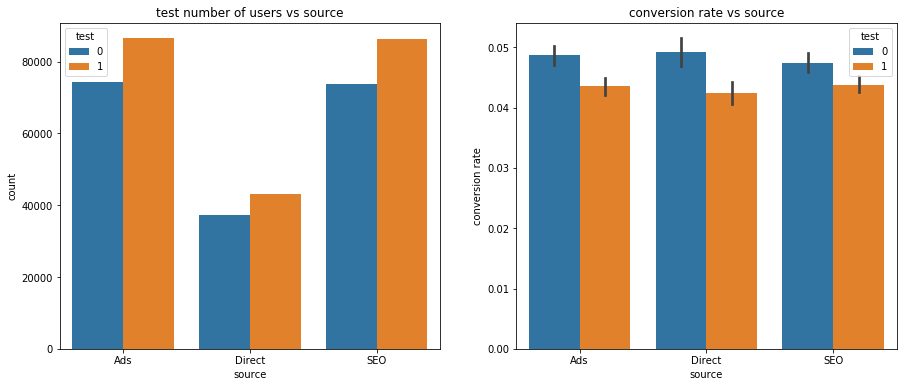

In [74]:
#visualization of source
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='source',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs source")

sns.barplot(x='source',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs source')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

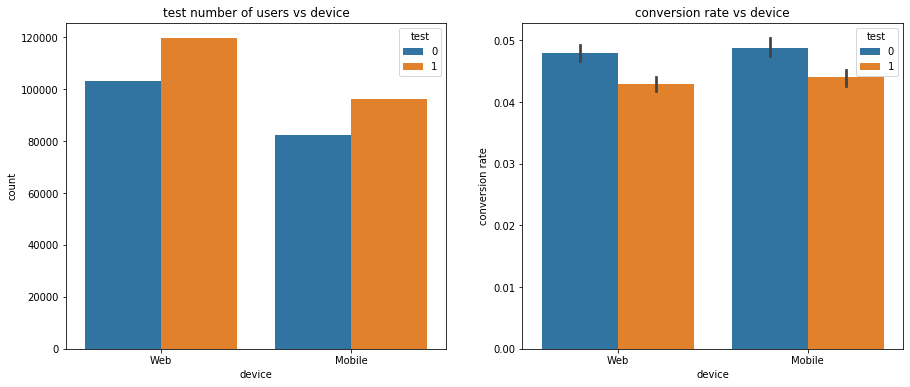

In [76]:
#visulization of device
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='device',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs device")

sns.barplot(x='device',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs device')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

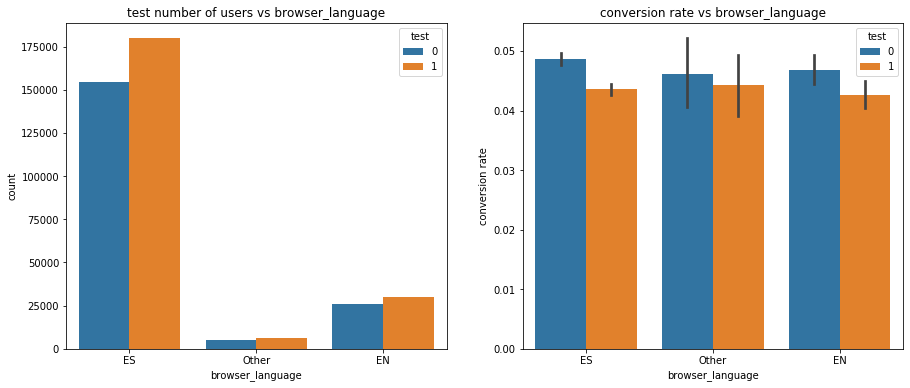

In [78]:
#visualization of browser language
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='browser_language',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs browser_language")

sns.barplot(x='browser_language',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs browser_language')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

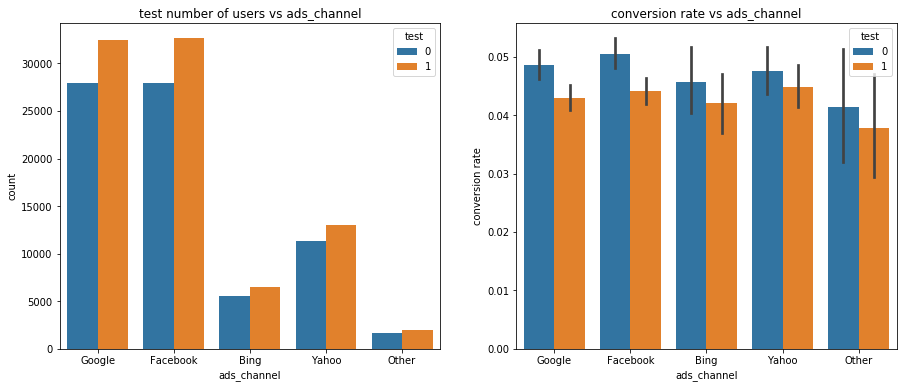

In [79]:
#visualization of ads channel
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='ads_channel',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs ads_channel")

sns.barplot(x='ads_channel',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs ads_channel')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

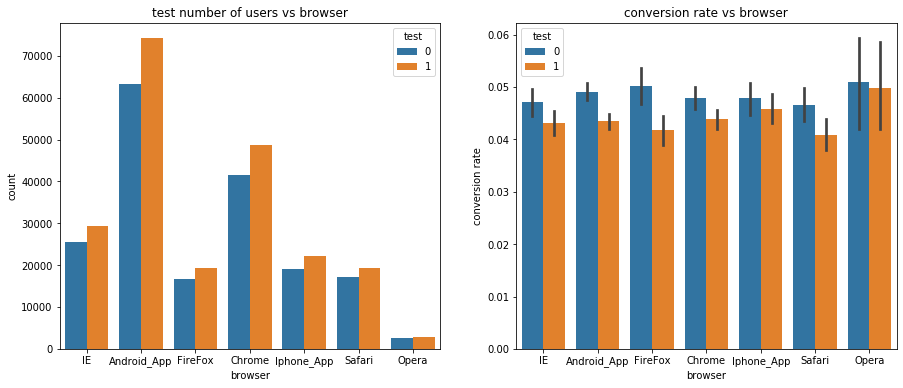

In [80]:
#visualization of browser 
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='browser',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs browser")

sns.barplot(x='browser',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs browser')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

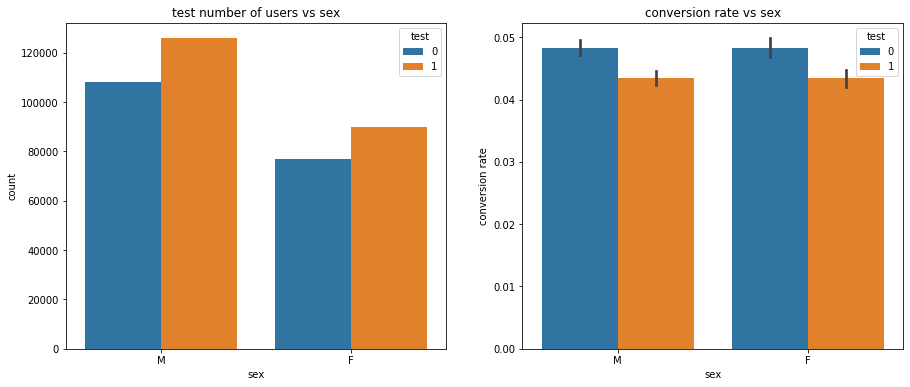

In [81]:
#visualization of sex
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='sex',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs sex")

sns.barplot(x='sex',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs sex')
axes[1].set_ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

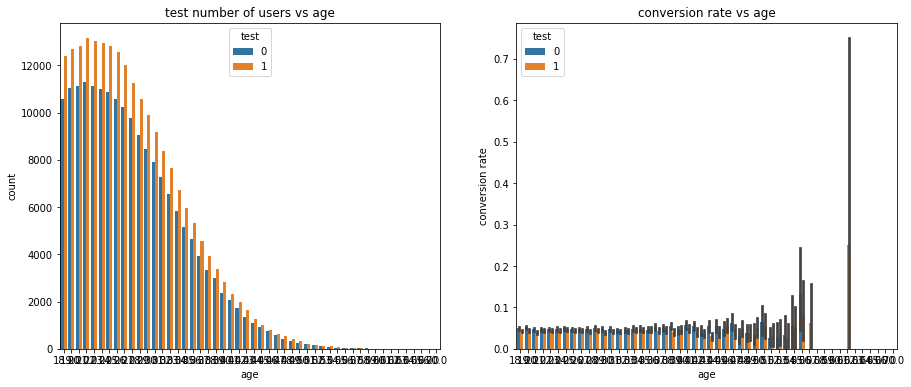

In [83]:
#visualization of age
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(15,6))
sns.countplot(x='age',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs age")

sns.barplot(x='age',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs age')
axes[1].set_ylabel('conversion rate')

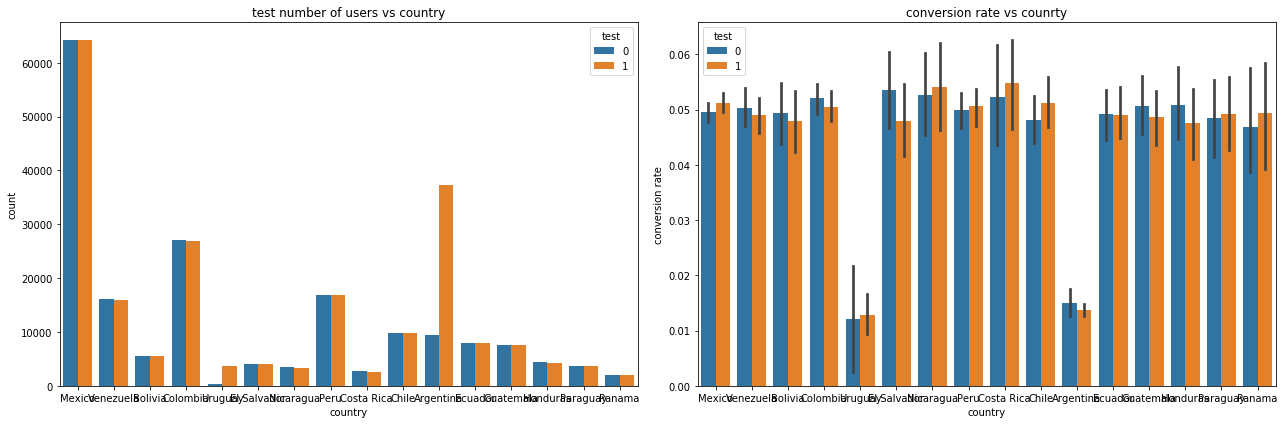

In [87]:
#visualization of country
fig, axes = plt.subplots(nrows =1, ncols=2,figsize=(18,6))
sns.countplot(x='country',hue='test',data=temp,ax=axes[0])
axes[0].set_title("test number of users vs country")

sns.barplot(x='country',y='conversion',hue='test',data=temp,ax=axes[1])
axes[1].set_title('conversion rate vs counrty')
axes[1].set_ylabel('conversion rate')
plt.tight_layout()